# Title: Sprint 5, Integrated Project
Summary: This project is an Exploratory Data Analysis project that uses the games.csv dataframe.  This project consists of: multiple bar charts, boxplots, scatter plots and histograms.  This project also includes standard deviation calculations, correlation calculations and hypothesis testing.

Coding Sections Solved(Still Needs Finishing)
[x]1) PS4 Scatterplot userscore and critic score (all done)
2) Genre Boxplot (code and code documentation finished, but still need to answer questions)
3) other platform boxplot (code and code documentation finished but still need to answer questions)

Still Need to work on:
1) NA, EU, JP Profile (Top 5 Platform and Top 5 Genre Platforms already done, but comparing sales between areas needs to be done.)] 2) Histogram games re do (sns) (document code and check conclusion)
3)str.lower
4) Document code for all tasks for extra added visualizations.
Other:
Insert reviewer's comment with note that I only put comments that need to be worked on.

Fix file path

# Step 1: Open the Data File and Study the General Information

Code Meaning: Import all the necessary libraries.  Pandas is used to import the dataframe.  Random is used used in order to make the random choice selecton when filling in missing values.  Plotly Express is used in order to create the charts for the project which are composed of: bar charts, histograms, boxplots and line charts.  Pearsonr is imported to calculate the correlation between two variables. Stats is imported to run the ttest and test hypotheses.  Numpy is imported to perform mathematical tasks.

In [1]:
import pandas as pd

import random

import plotly.express as px

from matplotlib import pyplot as plt

from scipy import stats as st

from scipy.stats import pearsonr

import numpy as np

import seaborn as sns

# Importing the Dataset

Code Meaning: 
1) Use pd.read_csv() in order to import the games.csv dataframe.  Save the dataframe under the variable df.
2) Use the head() function in order to print the first five rows of the dataframe to check the entries in the rows.

Code Result:
The games.csv dataframe was imported successfully, but it seems that there are missing values in the dataframe and the column names need to be converted to lowercase. The total_sales column must also be calculated which consists of the total of the NA_sales, EU_sales, JP_sales, and Other_sales column.

In [2]:
df = pd.read_csv('games.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Code Meaning:
Use the columns function in order to double check all the column names in the dataframe.

Code Result:
The column names in the dataframe seem to be listed in uppercase and should be converted to lowercase.  

# Step 2: Prepare the Data

Renaming the Columns

In [3]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Code Meaning:  Use the rename() function on the df dataframe to rename the column names appropriately in lowercase format.

In [4]:
df = df.rename({'Name': 'name', 'Platform': 'platform','Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales','JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}, axis=1)

Code Meaning:  Use .columns once again to check the column names in the df dataframe.

Code Result: The column names in the df dataframe were renamed in lowercase format succesfully.

In [5]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

# Checking the Data Types

Code Meaning:  Use the info() method to check the datatypes in the dataframe.

Code Result: The user_score column should be converted from object type to float64 type and the year_of_release column should converted from float64 type to integer type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Code Meaning:  
1) Use the pd.to_numeric() function to convert the user_score column of the df dataframe from object to float64.  
2) Add errors='coerce' as an argument to pd.to_numeric().

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [8]:
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

Code Meaning:  Use the info() method once again on the df dataframe in order to check the data types again.

Code Result:  The user_score column was successfull converted from object to float64.  The year_of_release cannot be converted to the proper datatype because there values listed as the string 'tbd' in the column.  The year_of_release column wil be converted to the proper data type further on in the project.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


# Creating the total_sales column

Code Meaning:  
1) Use the def() function in order to create a function that adds the na_sales, eu_sales, jp_sales, and other_sales in the df dataframe in order to create the total_sales column.  Name the function: calc_revenue().  
2) Use row as an input arguement to calc_revenue().

In [10]:
def calc_revenue(row):
    revenue = 0
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    revenue = na_sales + eu_sales + jp_sales + other_sales
    return revenue
    

Code Meaning:  
1) Use the apply() function in order to apply the previously created calc_revenue() function to the df dataframe.  
2) Set the axis to 1 in order apply the function to all rows.  
3) Assign the code to df['total_sales'] in order to save the result and create the total_sales column in the df dataframe.
4) Use the head() function to check the result.

Code Result:
The total_sales column of the df dataframe was created successfully.

In [11]:
df['total_sales'] = df.apply(calc_revenue, axis=1)

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Checking for Duplicate Values

# Reviewer's Note:
There is no check for duplicates. Please add them.

Code Meaning:
Use the duplicated() and sum() methods on the df dataframe in order check for duplicate values.

Code Result:
There are no duplicate values noted in the dataframe.

In [12]:
df.duplicated().sum()

0

# Dealing with Missing Values

# Reviewer's Comment:

Substituting missing values for the median can skew the data and introduce some problem in further analysis. Let me elaborate on the causes and consequences of this approach.

distortion of the distribution: When we replace missing values with the median, we are actually adding new values to the data set. This can lead to a shift in the distribution and distort the statistical properties of the data. Replacing by the median can make the data look more homogeneous than it actually is.

Possible consequences: Substituting missing values for the median can affect many aspects of data analysis:

Statistical tests: Distorted data can lead to incorrect conclusions in statistical tests. The use of skewed data can lead to incorrect results in significance tests and estimation of effects between groups or conditions.

Modeling: When distorted data are used to build models, models may also suffer from distortion and produce incorrect predictions or conclusions. This can be particularly important if missing values are associated with key model variables.

Inferences and interpretation: Distorted data can lead to incorrect inferences and misinterpretation of results. For example, if missing values are associated with important factors, replacing with the median may lead to misunderstanding the effect of these factors on the variable under study.

So, instead of replacing missing values with median, it is recommended to apply other approaches to handle missing data such as:

Removing records with missing values: If the number of records with missing values is small compared to the total amount of data, deleting these records may be a reasonable approach.

Data Imputation: Using more sophisticated techniques such as data imputation can help recover missing values based on other variables in the dataset.For example, machine learning models can be used to predict missing values based on the available data. It is important to assess the reason for missing values and choose an approach to handle them based on the specifics of the data and the objectives of the study.Proper handling of missing values helps to maintain the accuracy and reliability of data analysis.


# Reviewer's Comment:
Why fill with a random value?

Code Meaning:
Use the isna() and sum() functions in order to count the number of missing values in the df dataframe.

Code Result:
There are missing values noted in the name, year_of_release, critic_score, user_score, and rating columns of the df dataframe.

In [13]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
total_sales           0
dtype: int64

Code Meaning:
1) Use the dropna() method in order to drop the missing values from the name column of df dataframe by adding subset=['name'] as an arguement to df.dropna().
2) Assign the code to df in order to save the result.
3) Use the isna() and sum() methods on the name column of the df dataframe to check for missing values.

Code Result:
There are no more missing values noted in the name column of the df dataframe.

In [14]:
#new solution/ correction)
df = df.dropna(subset=['name'])

df['name'].isna().sum()

0

Code Meaning: 
1) Use the transform(), fillna() and median() methods on the year_of_release column of the df dataframe in order to fill the the year_of_release column with the median.
2) Use the isna() and sum() methods in order to check for missing values in the year_of_release column of the df dataframe.

Code Result:
There are no more missing values noted in the year_of_release column of the df dataframe.

In [15]:
#new solution
df['year_of_release'] = df['year_of_release'].transform(lambda x: x.fillna(x.median()))

df['year_of_release'].isna().sum()

0

Code Result:
1) Use the astype() method with int as an argument on the year_of_release column of the df dataframe in order to convert the column from float64 to int32 data type.
2) Use the info() function on the df dataframe in order to double check the data types.

Code Result:
The year_of_release column of the df dataframe was converted to int32 succesfully.

In [16]:
df['year_of_release'] = df['year_of_release'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


Code Meaning:
1) Use the dropna() method in order to drop the missing values from the genre column of df dataframe by adding subset=['genre'] as an arguement to df.dropna().
2) Assign the code to df in order to save the result.
3) Use the isna() and sum() methods on the genre column of the df dataframe to check for missing values.

Code Result:
There are no more missing values noted in the genre column of the df dataframe.

In [17]:
#new solution/ correction
df = df.dropna(subset=['genre'])

df['genre'].isna().sum()

0

Code Meaning:
1) Use the fillna() method in order to fill the missing values in the rating column of the df dataframe with the string 'undefined'.
2) Use inplace=True in order to save the result.
3) Use the isna() and sum() methods in order to check for missing values in the df dataframe.

Code Result:
There are no more missing values noted in the rating column of the df dataframe.

In [18]:
df['rating'].fillna('undefined', inplace=True)
df['rating'].isna().sum()

0

Code Meaning:
1) Use the dropna() method in order to drop the missing values from the critic_score column of df dataframe by adding subset=['critic_score'] as an arguement to df.dropna().
2) Assign the code to df in order to save the result.
3) Use the isna() and sum() methods on the critic_score column of the df dataframe to check for missing values.

Code Result:
There are no more missing values noted in the critic_score column of the df dataframe.

In [19]:
df = df.dropna(subset=['critic_score'])

df['critic_score'].isna().sum()

0

Code Meaning:
1) Use the dropna() method in order to drop the missing values from the user_score column of df dataframe by adding subset=['user_score'] as an arguement to df.dropna().
2) Assign the code to df in order to save the result.
3) Use the isna() and sum() methods on the user_score column of the df dataframe to check for missing values.

Code Result:
There are no more missing values noted in the user_score column of the df dataframe.

In [20]:
df = df.dropna(subset=['user_score'])

df['user_score'].isna().sum()

0

Code Meaning:
Use the isna() and sum() methods in order to double check for missing values in the df dataframe.

Code Result:
There are no more missing values noted in the df dataframe. The missing values were filled in or dropped successfully.

In [21]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

Code Meaning: Use the info() method on the df dataframe in order to check the datatype for the year_of_release column.

Code Result:  The year_of_release column was converted to int32 successfully.  All other data types in the dataframe appear appropriate.

### Note to the reviewer:
One of the tutors on the Sprint Channels advised me to use the median to fill in the year_of_release column and to leave the NANs in the critic_score and user_score columns in place, but the critic_score and user_score columns were giving me errors in my future codes if I left them as is.  So, I just decided to drop the missing values in the critic_score and user_score columns instead.  I am not sure if this is correct.

# Step 3: Analyze the Data

# Number of Video Games Released per Year Histogram

Question Being Addressed:
Look at how many games were released in different years. Is the data for every period significant?
Answer: It appears that 2008 and 2009 had the most amount of games released for those years.  It also appears that 1980, 1984, and 1985 had the least amount of games released for those years.  It also appears that after the spike of games being released in 2008 and 2009, there is a gradual decline in the release of games doing towards 2016.

Code Meaning:
1) Use px.histogram() in order to generate a histogram titled: "Number of Video Games Released Per Year".
2) Enter the df dataframe as the data for the chart.  
3) Use the year_of_release column of the df dataframe as the x axis.
4) Assign the code to fig_1 in order to save the result.
5) Use the update_xaxes() method on fig_1 in order to arrange the x axes so that the tick values are measured by the individual unqiue values in the year_of_release column.  Set the tick text in order to list each unique value from the year_of_release column of the df dataframe on the x axis as integers.
6) Use fig_1.show() in order to display the chart.

Code Result/ Answer to Question:

In [22]:
fig_1 = px.histogram(df, x='year_of_release', labels={"year_of_release": "Year Of Release"}, title="Number of Video Games Released per Year")

fig_1.update_xaxes(tickvals=df['year_of_release'].unique(), ticktext=[int(x) for x in df['year_of_release'].unique()])
fig_1.show()

# Total Sales Per Platform Bar Chart

Question being Addressed:
Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
The platforms with the greatest total sales are:
1) PS2 - $1,255.77 per year total sales
2) X360 - $971.42 per year total sales
3) Wii - $907.51 per year total sales
*The distribution for the year for each of these platforms will be displayed in the next task.

Note to reviewer: I am

In [23]:
sales_games = df.groupby('year_of_release').agg({'name':'count'})
sales_games = sales_games.rename(columns={'name':'Number of Games Sold'}, level=0)
sales_games.index = sales_games.index.rename('year')
sales_games.head()

,Number of Games Sold
year,
1985,1
1988,1
1992,1
1994,1
1996,8


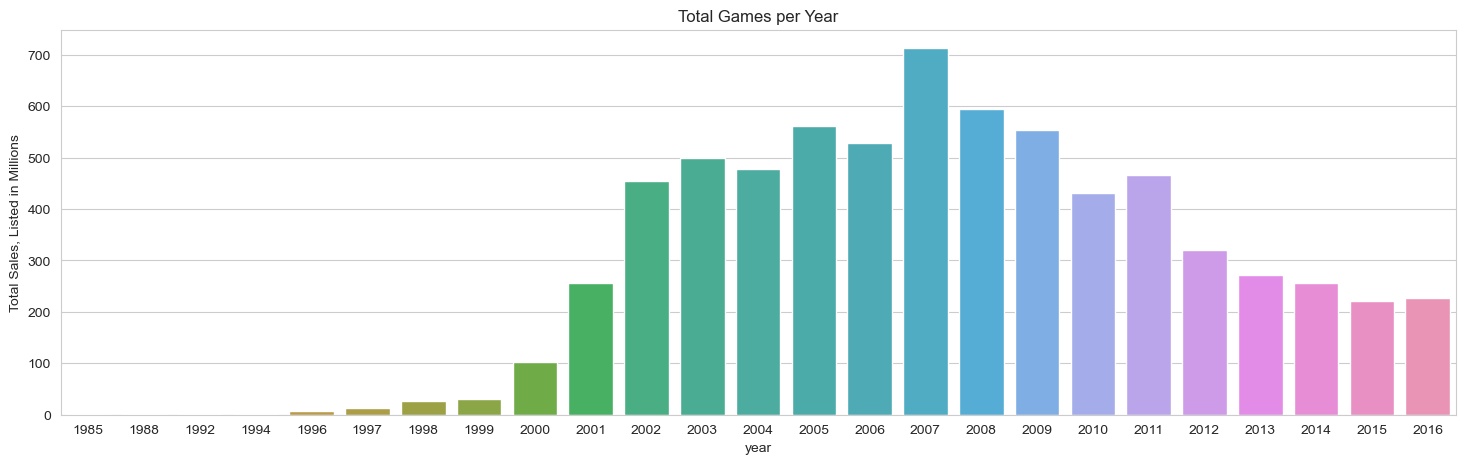

In [24]:
sales_games = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(18,5))
sns.countplot(data=df, x='year_of_release');
plt.title('Total Games per Year')
plt.ylabel('Total Sales, Listed in Millions');
plt.xlabel('year');

Code Meaning: 
1) In order to get rid of stacked values in the data for the bar chart by using the groupby function on df dataframe and grouping by platform.
2) In the same line of code, use the sum() method in on the total_sales column of the df dataframe in order to sum up the total values.
3) Assign the code to fig_2_sum in order to save the result.
4) Create another dataframe called fig_sum_2_df by using the reset_index() method on the fig_sum_2 dataframe.
5) Use the rename() method in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter.
6) Use the head() function in order to print the first five lines of fig_2_sum_df.

Code Result:
fig_2_sum_df was created successfully.

In [25]:
fig_2_sum = df.groupby('platform')['total_sales'].sum()

fig_2_sum_df = fig_2_sum.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

fig_2_sum_df.head()

,platform,total_sales_sum
0,3DS,123.99
1,DC,4.55
2,DS,383.87
3,GBA,132.53
4,GC,160.60


Code Meaning:
1) Use px.bar() in order to create a bar chart titled: 'Total Sales Per Platform'.
2) Use the fig_2_sum_df dataframe as the data.
3) Use the platform column of the fig_2_sum df dataframe as the x axis and the total_sales_sum column as the y axis.
4) Use the platform column as the color parameter in order to make it easier to differentiate the data in each platform on the chart.
5) Use fig_2.show() in order to display the chart. 


In [26]:
#create dataframe just for the  bar chart,  no other values
fig_2 = px.bar(fig_2_sum_df, x='platform', y='total_sales_sum', labels={"total_sales_sum": "Sum of Total Sales", "platform": "Platform"}, color='platform', title='Total Sales Per Platform')

fig_2.show()

Total Sales Per Year of the Top 3 Platforms


Question/Task Answered:
Which platforms are leading in sales? 
The platforms which are leading in sales are:
1) PS2
2) X360
3) Wii

Code Meaning:
1) Create a new filtered dataframe called ps_2 that only displays results that have PS2 listed as a result for the platform column.
2) Use the head() method to print the first five lines of the ps_2 dataframe.

Code Result:
The entries in the rows of the ps_2 dataframe appear to be listed correctly.  The ps_2 dataframe was created successfully.

In [27]:
ps_2 = df[df['platform'] == 'PS2']

ps_2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65


Code Meaning:
1) Create a new filtered dataframe called x_360 that only displays results that have X360 listed as a result for the platform column.
2) Use the head() method to print the first five lines of the X_360 dataframe.

Code Result:
The entries in the rows of the X_360 dataframe appear to be listed correctly.  The X_360 dataframe was created successfully.

In [28]:
x_360 = df[df['platform'] == 'X360']

x_360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


Code Meaning:
1) Create a new filtered dataframe called wii that only displays results that have Wii listed as a result for the platform column.
2) Use the head() method to print the first five lines of the wii dataframe.

Code Result:
The entries in the rows of the wii dataframe appear to be listed correctly.  The wii dataframe was created successfully.

In [29]:
wii = df[df['platform'] == 'Wii']

wii.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32


Code Meaning:
1) Use px.bar() in order to create a bar chart titled: 'PS2 Total Sales per Year'.
2) Use the year_of_release column as the x axis of the chart and the total_sales column as the y axis of the chart.
3) Assign the result to ps_2_bar in order to save the result.
4) Use the update_xaxes() method in order to set the tick values of the x axis as each individual unique value of the year_of_release column of the ps_2 dataframe. Set the tick text to display each value on the x axis as each individual unique value of the year_of_release column of the ps_2 dataframe as an integer.
5) Use the show() method in order to display the ps_2_bar bar chart.

Code Meaning: 
1) In order to get rid of stacked values in the data for the bar chart by using the groupby function on the ps_2 dataframe and grouping by platform.
2) In the same line of code, use the sum() method in on the total_sales column of the ps_2 dataframe in order to sum up the total values.
3) Assign the code to ps_2_sum in order to save the result.
4) Use the reset_index() method on the ps_2_sum dataframe.
5) Use the rename() method in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter.
6) Use the head() function in order to print the first five lines of ps_2_sum.

Code Result:
ps_2_sum was created successfully.

In [30]:
ps_2_sum = ps_2.groupby('year_of_release')['total_sales'].sum()
ps_2_sum = ps_2_sum.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

ps_2_sum.head()

,year_of_release,total_sales_sum
0,2000,29.50
1,2001,145.96
2,2002,169.99
3,2003,144.27
4,2004,188.34


In [152]:
ps_2_bar = px.bar(ps_2_sum, x='year_of_release', y='total_sales_sum',labels={"total_sales_sum": "Sum of Total Sales","year_of_release": "Year Of Release" }, title='PS2 Total Sales per Year', color='year_of_release')

ps_2_bar.update_xaxes(tickvals=ps_2['year_of_release'].unique(), ticktext=[int(x) for x in ps_2['year_of_release'].unique()])

ps_2_bar.show()

Conclusion:  It appears that PS2 sales were highest in the year 2004 with $211.81 M total sales noted and PS2 sales were lowest in the year 2011 with $0.45 M in total sales noted.

Code Meaning: 
1) In order to get rid of stacked values in the data for the bar chart by using the groupby function on x_360 dataframe and grouping by platform.
2) In the same line of code, use the sum() method in on the total_sales column of the x_360 dataframe in order to sum up the total values.
3) Assign the code to x_360_sum in order to save the result.
4) Use the reset_index() method on the x_360_sum dataframe.
5) Use the rename() method in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter.
6) Use the head() function in order to print the first five lines of x360_sum.

Code Result:
x360_sum was created successfully.

In [32]:
x_360_sum = x_360.groupby('year_of_release')['total_sales'].sum()
x_360_sum = x_360_sum.reset_index().rename(columns={'total_sales': 'total_sales_sum'})
x_360_sum.head()

,year_of_release,total_sales_sum
0,2005,7.64
1,2006,48.92
2,2007,99.11
3,2008,129.16
4,2009,110.67


Code Meaning:
1) Use px.bar() in order to create a bar chart titled: 'X360 Total Sales per Year'.
2) Use the year_of_release column as the x axis of the chart and the total_sales column as the y axis of the chart.
3) Assign the result to X360_bar in order to save the result.
4) Use the update_xaxes() method in order to set the tick values of the x axis as each individual unique value of the year_of_release column of the X_360 dataframe. Set the tick text to display each value on the x axis as each individual unique value of the year_of_release column of the X_360 dataframe as an integer.
5) Use the show() method in order to display the X_360_bar bar chart.

In [151]:
x_360_bar = px.bar(x_360_sum, x='year_of_release', y='total_sales_sum',labels={"total_sales_sum": "Sum of Total Sales", "year_of_release": "Year of Release"}, title='X360 Total Sales per Year', color='year_of_release')

x_360_bar.update_xaxes(tickvals=x_360['year_of_release'].unique(), ticktext=[int(x) for x in x_360['year_of_release'].unique()])

x_360_bar.show()

Conclusion:  It appears that X360 had the highest total sales in the year 2010 with $180.21 M in total sales noted and the lowest total sales in the year 2016 with $1.52 M total sales noted.

Code Meaning: 
1) In order to get rid of stacked values in the data for the bar chart by using the groupby function on wii dataframe and grouping by platform.
2) In the same line of code, use the sum() method in on the total_sales column of the wii dataframe in order to sum up the total values.
3) Assign the code to wii_sum in order to save the result.
4) Use the reset_index() method on the wii_sum dataframe.
5) Use the rename() method in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter.
6) Use the head() function in order to print the first five lines of wii_sum.

Code Result:
wii_sum was created successfully.

In [34]:
wii_sum = wii.groupby('year_of_release')['total_sales'].sum()
wii_sum = wii_sum.reset_index().rename(columns={'total_sales': 'total_sales_sum'})
wii_sum.head()

,year_of_release,total_sales_sum
0,2006,135.02
1,2007,140.92
2,2008,130.99
3,2009,151.01
4,2010,67.92


Code Meaning:
1) Use px.bar() in order to create a bar chart titled: 'Wii Total Sales per Year'.
2) Use the year_of_release column as the x axis of the chart and the total_sales column as the y axis of the chart.
3) Assign the result to wii_bar in order to save the result.
4) Use the update_xaxes() method in order to set the tick values of the x axis as each individual unique value of the year_of_release column of the wii dataframe. Set the tick text to display each value on the x axis as each individual unique value of the year_of_release column of the wii dataframe as an integer.
5) Use the show() method in order to display the wii_bar bar chart.

In [150]:
wii_bar = px.bar(wii_sum, x='year_of_release', y='total_sales_sum', labels={"total_sales_sum": "Sum of Total Sales", "year_of_release": "Year of Release"}, title='Wii Total Sales per Year', color='year_of_release')

wii_bar.update_xaxes(tickvals=wii['year_of_release'].unique(), ticktext=[int(x) for x in wii['year_of_release'].unique()])

wii_bar.show()

Conclusion:  It appears that Wii had the highest total sales in the year 2009 with $223.30 total sales noted and the lowest amount of sales in the year 2016 with $0.18 in total sales noted.

# Total Sales Per Release Year Line Charts

Question Being Addressed:
 Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

 The platforms that used to be popular, but now have zero sales are as listed: '3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2','PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'  
 
 The greatest amount of time that it takes for a new platform to appear and fade is 30 years and the shortest amount of time for a new platform to appear and fade is approximately 3 years.

Code Meaning: To make it easier to formulate the latter codes, check the list of unique values in order in the year_of_release columns by using the sort_values() and unique() methods in the year_of_release column of the df dataframe.

Code Result:
It seems like the most recent year of entries in the year_of_release column of the df dataframe is 2016, which is the year which will be omitted from the new dataframe that will be created in order to form the line charts.

In [36]:
df['year_of_release'].sort_values().unique()

array([1985, 1988, 1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

Code Meaning:  
1) Create a filtered dataframe from the df dataframe that does not contain any entries for '2016' from the year_of_release column of the df dataframe.
2) Assign the new dataframe the name: no_sales_1 in order to save the results and create the new dataframe.
3) Use the head() method on the no_sales_1 dataframe in order to print the first five rows of the dataframe in order to check for any errors.

Code Result: 
It appears that the entries in the rows of the no_sales_1 dataframe are listed correctly.  The dataframe was created successfully.

In [37]:
no_sales_1 = df[df['year_of_release'] != '2016']

no_sales_1.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Code Meaning:  Make a list of the names of the different platforms in the no_sales_1 dataframe by using the unique() method on the dataframe.

Code Result:  There too many different platforms listed in the platform column of the no_sales_1 dataframe.  Four separate line charts must be created so that they information will not be overcrowded by having too many platforms listed in one line chart.

In [38]:
no_sales_1['platform'].sort_values().unique()

array(['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4',
       'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'], dtype=object)

Code Meaning: 
1) Create a list that contain the names: '3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2'(these are select names of the some of the platforms from the no_sales_1 dataframe) and assign the code to the variable
no_sales_2_list in order to save the result.
2) Use the isin() method on the platfrom column of the no_sales column in order to check for the specificed values in the no_sales_2_list variable.  Assign the code to no_sales_2_limited in order to save the result.
3) Create a new dataframe called no_sales_2 by adding the no_sales_2_limited variable as an arguement to a closed bracket [] next to the no_sales_2 dataframe.
4) Follow the same previous steps in order to create the no_sales_3 dataframe.

In [39]:
no_sales_2_list = ['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2']
no_sales_2_limited = no_sales_1['platform'].isin(no_sales_2_list)
no_sales_2 = no_sales_1[no_sales_2_limited]

no_sales_3_list = ['PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']
no_sales_3_limited = no_sales_1['platform'].isin(no_sales_3_list)
no_sales_3 = no_sales_1[no_sales_3_limited]

Code Meaning:
1) In order to make the information cleaner and in order to get rid of stacked values, apply the groupby() method to the no_sales_2 dataframe and groupby the platform and year_of_release columns.  
2)Use the agg() and sum() function on the total_sales column of the no_sales_2 dataframe.
3) Use the reset_index() method in order to reset the index.
4) Assign the result platform_sales_year_1 in order to save the result and create a platform_sales_year_1 dataframe which will be used to create the first line chart.
5) Repeat the same steps for the no_sales_3 dataframe in order to create the platform_sales_year_2 dataframe.

In [40]:
platform_sales_year_1 = no_sales_2.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

platform_sales_year_2 = no_sales_3.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

Code Meaning:
1) Use px.line() in order to create a line chart with data from the platform_sales_year_1 dataframe.
2) Use the year_of_release column as the x axis and the total_sales column as the y axis.
3) Set the color parameter to the platform column of the dataframe.
4) Set the title as: 'Line Chart of Total Sales per Year of Release for Platforms: 3DS-PS2 '.
5) Assign the code to no_sales_line in order to save the result.
6) Use the show() method in order to display the no_sales_line chart.

In [173]:
#platform, release_year, total_sales
no_sales_line = px.line(platform_sales_year_1, x='year_of_release', y='total_sales',color='platform',labels={"total_sales": "Total Sales", "year_of_release": "Year of Release"}, title='Line Chart of Total Sales per Year of Release Platforms: DS-X360')
no_sales_line.update_layout(plot_bgcolor='white', xaxis=dict(showgrid=True, gridcolor='lightgrey'), yaxis=dict(showgrid=True, gridcolor='lightgrey'))
no_sales_line.update_xaxes(showline=True, linewidth=2, linecolor='black')
no_sales_line.update_yaxes(showline=True, linewidth=2, linecolor='black')
no_sales_line.show()

Code Meaning:
1) Use px.line() in order to create a line chart with data from the platform_sales_year_2 dataframe.
2) Use the year_of_release column as the x axis and the total_sales column as the y axis.
3) Set the color parameter to the platform column of the dataframe.
4) Set the title as: 'Line Chart of Total Sales per Year of Release for Platforms: PS2-XOne'.
5) Assign the code to no_sales_line_2 in order to save the result.
6) Use the show() method in order to display the no_sales_line_2 chart.

In [172]:
no_sales_line_2 = px.line(platform_sales_year_2, x='year_of_release', y='total_sales',labels={"total_sales": "Total Sales", "year_of_release": "Year of Release"}, color='platform', title='Line Chart of Total Sales per Year of Release for Platforms: 2600-XOne')
no_sales_line_2.update_layout(plot_bgcolor='white', xaxis=dict(showgrid=True, gridcolor='lightgrey'), yaxis=dict(showgrid=True, gridcolor='lightgrey'))
no_sales_line_2.update_xaxes(showline=True, linewidth=2, linecolor='black')
no_sales_line_2.update_yaxes(showline=True, linewidth=2, linecolor='black')
no_sales_line_2.show()

# 2016 Boxplots

Question/ Task Being Addressed:
Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.
Model for 2017:
1) It appears that the best selling genre for 2016 was 'Shooter' which had a total of $38.22 M per year total sales, which could possibly be a profitable genre for 2017.
2) It appears that the best selling platform for 2016 was 'PS4' which had a total sales $69.25 M per year total sales, which could possibly be a profitable genre for 2017.
3) It appears that the best selling rating for games for 2016 is 'E' which had a total sales of $58.34 M per year total sales, which could be a proftiable game rating for 2017.

In [43]:
df['year_of_release'].sort_values().unique()

array([1985, 1988, 1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

In [44]:
df_2016 = df[df['year_of_release'] == 2016]
df_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80


Code Meaning: 
1) In order to get rid of stacked values in the data for the bar chart by using the groupby function on the df_2016 dataframe and grouping by platform.
2) In the same line of code, use the sum() method in on the total_sales column of the df_2016 dataframe in order to sum up the total values.
3) Assign the code to g_2106 in order to save the result.
4) Use reset_index() method on the g_2016 dataframe.
5) Use the rename() method in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter.
6) Use the head() function in order to print the first five lines of g_2016.

Code Result:
g_2016 was created successfully.

In [45]:
g_2016 = df_2016.groupby('genre')['total_sales'].sum()
g_2016 = g_2016.reset_index().rename(columns={'total_sales': 'total_sales_sum'})
g_2016.head()

,genre,total_sales_sum
0,Action,19.37
1,Adventure,1.51
2,Fighting,4.15
3,Misc,0.75
4,Platform,1.20


Code Meaning:
1) Use px.bar() in order to create a bar chart with the data from the g_2016 dataframe titled: "Total Sales per Genre 2016".
2) Use the genre column of the g_2016 dataframe as the x axis and the total_sales_sum column as the y axis.
3) Relabel x and y axes appropriately.
4) Use the show() method in order to display the chart.

Code Meaning:

In [164]:
g_bar_2016 = px.bar(g_2016,x='genre', y='total_sales_sum',labels={"total_sales_sum": "Sum of Total Sales", "genre": "Genre"}, title='Total Sales per Genre 2016', color='genre')
g_bar_2016.update_layout(plot_bgcolor='white', yaxis=dict(showgrid=True, gridcolor='black'), margin=dict(l=60, r=60, t=50, b=50))
g_bar_2016.update_xaxes(showline=True, linewidth=2, linecolor='black')
g_bar_2016.update_yaxes(showline=True, linewidth=2, linecolor='black')
g_bar_2016.show()

Code Meaning: 
1) In order to get rid of stacked values in the data for the bar chart by using the groupby function on df_2016 dataframe and grouping by platform.
2) In the same line of code, use the sum() method in on the total_sales column of the df_2016 dataframe in order to sum up the total values.
3) Assign the code to p_2016 in order to save the result.
4) Use the reset_index() method on the p_2016 dataframe.
5) Use the rename() method in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter.
6) Use the head() function in order to print the first five lines of p_2016.

Code Result:
p_2016 was created successfully.

In [47]:
p_2016 = df_2016.groupby('platform')['total_sales'].sum()
p_2016 = p_2016.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

Code Meaning:
1) Use px.bar() in order to create a bar chart with the data from the p_2016 dataframe titled: "Total Sales per Platform 2016".
2) Use the platform column of the p_2016 dataframe as the x axis and the total_sales_sum column as the y axis.
3) Relabel x and y axes appropriately.
4) Use the show() method in order to display the chart.

In [176]:
p_bar_2016 = px.bar(p_2016, x='platform', y='total_sales_sum',labels={"total_sales_sum": "Sum of Total Sales", "platform": "Platform"}, title='Total Sales per Platform 2016', color='platform')
p_bar_2016.update_layout(plot_bgcolor='white', yaxis=dict(showgrid=True, gridcolor='black'), margin=dict(l=60, r=60, t=50, b=50))
p_bar_2016.update_xaxes(showline=True, linewidth=2, linecolor='black')
p_bar_2016.update_yaxes(showline=True, linewidth=2, linecolor='black')
p_bar_2016.show()

Code Meaning: 
1) In order to get rid of stacked values in the data for the bar chart by using the groupby function on df_2016 dataframe and grouping by platform.
2) In the same line of code, use the sum() method in on the total_sales column of the df_2016 dataframe in order to sum up the total values.
3) Assign the code to r_2016 in order to save the result.
4) Use the reset_index() method on the r_2016 dataframe.
5) Use the rename() method in order to rename the total_sales column to total_sales_sum. Use columns= as the parameter.
6) Use the head() function in order to print the first five lines of r_2016.

Code Result:
r_2016 was created successfully.

In [49]:
r_2016 = df_2016.groupby('rating')['total_sales'].sum()
r_2016 = r_2016.reset_index().rename(columns={'total_sales': 'total_sales_sum'})

Code Meaning:
1) Use px.bar() in roder to create a bar chart with the data from the r_2016 dataframe titled: "Total Sales per Rating 2016".
2) Use the rating column of the r_2016 dataframe as the x axis and the total_sales_sum column as the y axis.
3) Relabel x and y axes appropriately.
4) Use the show() method in order to display the chart.

In [181]:
r_bar_2016 = px.bar(r_2016, x='rating', y='total_sales_sum',labels={"rating": "Rating", "total_sales_sum":"Sum of Total Sales"}, title="Total Sales per Rating 2016", color='rating')
r_bar_2016.update_layout(plot_bgcolor='white', yaxis=dict(showgrid=True, gridcolor='black'), margin=dict(l=60, r=60, t=50, b=50))
r_bar_2016.update_xaxes(showline=True, linewidth=2, linecolor='black')
r_bar_2016.update_yaxes(showline=True, linewidth=2, linecolor='black')
r_bar_2016.show()

# Boxplots For Global Sales of All Games

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Conclusions:
Top 3 Platforms with the Highest Average Sales:
1) WiiU is the number 1 platform with the highest average sales with a median sales value of $0.43 M.
2) XOne is the number 2 platform with the highest average sales with a median sales value of  $0.32 M.
3) PS4 is the number 3 platform with the highest average sales with a median sales value of  $0.26 M.

Top 3 Platforms with the Lowest Average Sales:
1) PC is the number 1 platform with the lowest average sales with a median sales value of $0.1 M.
2) PSV is the number 2 platform with the lowest average sales with a median sales value of $0.11 M.
3) X360 is the number 3 platform with the lowest average sales with a median sales value of $0.135 M.

### Reviewer's Comment: 

For the purpose of predicting sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you shouldn't take too long a time interval - otherwise you're bound to capture trends that are already outdated. But you shouldn't take too short a period either

In [51]:
df['year_of_release'].unique()

array([2006, 2008, 2009, 2005, 2007, 2010, 2013, 2004, 2002, 2001, 2011,
       2012, 2014, 1997, 1999, 2015, 2016, 2003, 1998, 1996, 2000, 1994,
       1985, 1992, 1988])

Code Meaning: For reference and convenience, print out the individual names of all the platforms in the plaform column of the df dataframe using the unique() method.

Code Result:  There are too many platform names in the platform column of the df dataframe. Eight separate boxplots must be created in order to display the data in a cleaner fashion and to avoid overcrowding the plot with too much data.  The eight boxplots consist of: 4 boxplots without a limited y axis in order to display the min and max values and four boxplots with the limited y axes in order to display the quartile, median and 75th percentile values for each platform.

### Correction in Respone to the Reviewer's Note

Code Meaning: 
1) Create a list that consists of the values 2014, 2015, and 2016 that are not listed in string format and assign the list to the variable current_year to save the result.
2) Use the isin() method on the year_of_release column of the df dataframe and use the current_year list as the input arguement for the isin() method.  Assign the code to the variable name current_year_1 to save the result.
3) Create a dataframe called current_year_df by inputing the current_year_1 variable in  open brackets[] next to the df dataframe.
4) Use the head() method in order to print the first five rows of current_year_df in order to check for errors.

Code Result:
The current_year_df dataframe was created successfully.

In [52]:
current_year = [2014, 2015, 2016]
current_year_1 = df['year_of_release'].isin(current_year)

current_year_df = df[current_year_1]

current_year_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Code Meaning:
1) Use px.box() in order to create a boxplot with the data from the current_year_df.  Use the platform column of the current_year_df dataframe as the x axis and use the total_sales column as the y axis. Set the title as: "Boxplot of Total Sales per Platform".
2) Use the labels parameter to rename the x and y axis appropriately.
3) Set the points parameter to False in order to remove any outliers.
4) Assign the code to current_year_box in order to save the result.
5) Use the update_yaxes() method in order to limit the y axis to 0 for the  minimum and 1.25 for the maximum.
6) Use the show() method on the current_year_box dataframe in order to display the dataframe.

In [185]:
current_year_box = px.box(current_year_df, x='platform', y='total_sales', labels={"platform" : "Platform", "total_sales" : "Total Sales"}, points=False, title=" Boxplot of Total Sales per Platform", color='platform')
current_year_box.update_yaxes(range=[0, 1.25])
current_year_box.show()

Code Meaning:
1) Use px.box() in order to create a boxplot with the data from the current_year_df.  Use the platform column of the current_year_df dataframe as the x axis and use the total_sales column as the y axis. Set the title as: "Min/Max Boxplot of Total Sales per Platform".
2) Use the labels parameter to rename the x and y axis appropriately.
3) Set the points parameter to False in order to remove any outliers.
4) Assign the code to current_year_box_max in order to save the result.
6) Use the show() method on the current_year_box_max dataframe in order to display the dataframe.

In [145]:
current_year_box_max = px.box(current_year_df, x='platform', y='total_sales', points=False, labels={"total_sales" : "Total Sales", "platform" : "Platform"}, title="Min/Max Boxplot for Total Sales per Platform", color='platform')

current_year_box_max.show()

# PS4 Reviews/ Ratings ScatterPlot

Question/Task Being Addressed:
Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Answer: 
I chose to use the PS4 platform.  It appears the critic scores between 60-90 have the greatest concentration of total sales and critic scores between 0-40 have the lowest concentration of total sales.  It appears the user scores between 5 and 9 have the greatest concentration of total sales and user scores between 1  and 3 have the lowest concentration of total sales.
The correlation between critic score and total sales is 0.325 which is a positive, moderate correlation. The correlation between user score and total sales is 0.005 which is a fairly weak, but slighty positive correlation. Both critic score and user score columns have a positive slope when compared to the amount of total sales column of the dataframe.

### Reviewer's Note 
Please correct the conclusions after correcting the actual period

### Response to the Reviewer's Note
I tried to create another dataframe from the X360 dataframe that I previously created using only the years 2014, 2015, and 2016, but there were very few values on the scatterplot, so I decided to leave it as is.  I also tried to use the groupby() and sum() functions to groupby critic_score and user score and sum up the total_sales column, but there were still very few values.  Can I please get your feedback about this issue?

### Correction in Response to the Reviewer's Note

Code Meaning:
1) Create a filtered dataframe that only displays results for ps_4 in the platform section of the df dataframe.
2) Assign the code to ps_4 in order to save the result.

In [55]:
ps_4 = df[df['platform'] == 'ps_4']

Code Meaning:
1) Enter 2014, 2015, 2016 in a list with the variable ps_4_list.
2) Use the isin() method on the year_of_release column of the df dataframe with ps_4_list as the the input arguement. Assign the code to ps_4_d in order to save the result.
3) Place the ps_4_d variable in square brackets [] next to the df dataframe and assign the code to ps_4_df in order to save the result and create a new dataframe.
4) Use the head() method in order to print the first 5 lines of ps_4_df.

Code Result:
ps_4_df was created successfully.

In [56]:
ps_4_list = [2014, 2015, 2016]
ps_4_d = df['year_of_release'].isin(ps_4_list)
ps_4_df = df[ps_4_d]

ps_4_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Code Meaning:  
1) Use px.scatter() in order to make a scatterplot from the previously created ps_4_df dataframe.
2) Use the critic_score column from the ps_4_df dataframe as the x axis and use the total_sales column as the y axis.
3) Set the title as: 'How Critic Score Affects Sales for PS4'.
4) Assign the code to ps_4_scatter_1 in order to save the result.
6) Use the show() method to display the scatterplot.

In [144]:
ps_4_scatter_1 = px.scatter(ps_4_df, x='critic_score', y='total_sales', labels={"critic_score": "Critic Score", "total_sales": "Total Sales"}, title='How Critic Score Affect Sales for PS4', color='critic_score')


ps_4_scatter_1.show()

Code Meaning:  
1) Use px.scatter() in order to make a scatterplot from the previously created ps_4_df dataframe.
2) Use the user_score column from the ps_4_df dataframe as the x axis and use the total_sales column as the y axis.
3) Set the title as: 'How User Score Affects Sales for PS4'.
4) Assign the code to ps_4_scatter_2 in order to save the result.
5) Use the show() method to display the scatterplot.

In [143]:
ps_4_scatter_2 = px.scatter(ps_4_df, x='user_score', y='total_sales', labels={"user_score": "User Score", "total_sales": "Total Sales"}, title='How User Score Affect Sales for PS4', color='user_score')

ps_4_scatter_2.show()

1) Create a variable called x_list_1 that consists of the critic_score column of the ps_4_df dataframe.
2) Create a variable called x_list_2 that consists of the total_sales column of the ps_4_df dataframe.
3) Use the pearsonr() function to calculate the correlation between x_list_1 and x_list_2.  Save this code under the variable ps_4_corr.
4)Print ps_4_corr

In [59]:
x_list_1 = ps_4_df['critic_score']
x_list_2 = ps_4_df['total_sales']

ps_4_corr = pearsonr(x_list_1, x_list_2)
ps_4_corr

PearsonRResult(statistic=0.3253626120075883, pvalue=8.023861752089072e-19)

1) Create a variable called xu_list_1 that consists of the user_score column of the ps_4_df dataframe.
2) Create a variable called xu_list_2 that consists of the total_sales column of the ps_4_df dataframe.
3) Use the pearsonr() function to calculate the correlation between xu_list_1 and xu_list_2.  Save this code under the variable ps_4_corr_2.
4)Print ps_4_corr_2.

In [60]:
xu_list_1 = ps_4_df['user_score']
xu_list_2 = ps_4_df['total_sales']

ps_4_corr_2 = pearsonr(xu_list_1, xu_list_2)
ps_4_corr_2

PearsonRResult(statistic=0.005202258360087517, pvalue=0.8904086324923576)

# Scatterplot for Other Platforms

Question/ Task Being Addressed:
Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Answer:


Code Meaning:
1) Create a list containing the values: 2014, 2015, 2016 and assign the code to other_list in order to save the result.
2) Use the isin() method on the year_of_release column with other_list as the input arguement.
3) Place the other_d variable in closed brackets [] next to the df dataframe.  Assign the code to other_df in order to save the result and create the dataframe.
4) Use the head() method on the other_df dataframe in order to print the first five lines of the dataframe.

Code Result:
other_df was created successfully.

In [61]:
other_list = [2014, 2015, 2016]
other_d = df['year_of_release'].isin(other_list)
other_df = df[other_d]

other_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Code Meaning:
1) Use px.box() in order to create a boxplot with the other_df dataframe, titled "Quartile Boxplot for Total Sales per Platform".
2) Use the platform column from the other_df dataframe as the x axis and the total_sales as the y axis.  
3) Set the points to False in order to remove any outliers.
4) Assign the code to other_box in order to save the result.
5) Use the update_yaxes() method in order to limit the y axis to 0-1.2 using the range parameter.
6) Use the show() method in order to display the other_box dataframe.

In [142]:
other_box = px.box(other_df, x='platform', y='total_sales', labels={"platform" : "Platform", "total_sales": "Total Sales"}, points=False, title="Quartile Boxplot for Total Sales per Platform", color="platform")
other_box.update_yaxes(range=[0, 1.2])
#other_box.update_layout(bgcolor="white")
other_box.show()

Code Meaning:
1) Use px.box() in order to create a boxplot with the other_df dataframe, titled "Min/Max Boxplot for Total Sales per Platform".
2) Use the platform column from the max_other_df dataframe as the x axis and the total_sales as the y axis.  
3) Set the points to False in order to remove any outliers.
4) Assign the code to max_other_box in order to save the result.
5) Use the show() method in order to display the other_box dataframe.

In [109]:
max_other_box = px.box(other_df, x='platform', y='total_sales', labels={"platform" : "Platform", "total_sales": "Total Sales"}, points=False, title="Min/Max Boxplot for Total Sales per Platform", color='platform')

max_other_box.show()

# Total Sales per Genre Bar Chart

Task/Question Being Addressed:
Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

The top 3 most profitable genres are:
1) Action with a total sales sum of $1,744.17 M and a quantity count of 3,369.
2) Sports with a total sales sum of  $1331.27 M and a quantity count of 2,348.
3) Shooter witha total sales sum of $1052.45 M and a quantity count of 1,323.

The top 3 least profitable genres are:
1) Strategy with a total sales sum of $174.43 M and quantity count of 683.
2) Adventure with a total sales sum of $237.59 M and a quanity count of 1303.
3) Puzzle with a total sales sum of $242.57 M and a qunatity count of 580.

Conclusion:
It appears that genres with a greater total sales sum generally have a greater quantity count and vice versa.

Code Meaning:
1) Create a list containing the values: 2014, 2015, 2016 and assign the code to genre_list in order to save the result.
2) Use the isin() method on the year_of_release column with genre_list as the input arguement.
3) Place the genre_d variable in closed brackets [] next to the df dataframe.  Assign the code to genre_df in order to save the result and create the dataframe.
4) Use the head() method on the genre_df dataframe in order to print the first five lines of the dataframe.

Code Result:
genre_df was created successfully.

In [64]:
genre_list = [2014, 2015, 2016]
genre_d = df['year_of_release'].isin(genre_list)
genre_df = df[genre_d]

genre_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Code Meaning:
1) Use px.box() in order to create a boxplot with the genre_df dataframe, titled "Quartile Boxplot for Total Sales per Genre".
2) Use the genre column from the genre_df dataframe as the x axis and the total_sales as the y axis.  
3) Set the points to False in order to remove any outliers.
4) Assign the code to genre_box in order to save the result.
5) Use the update_yaxes() method in order to limit the y axis to 0-1.8 using the range parameter.
6) Use the show() method in order to display the genre_box dataframe.

In [110]:
genre_box = px.box(genre_df, x='genre', y='total_sales', labels={"genre" : "Genre", "total_sales" : "total_sales"}, title="Quartile Boxplot for Total Sales per Genre", points=False, color='genre')

genre_box.update_yaxes(range=[0, 1.8])

genre_box.show()

Code Meaning:
1) Use px.box() in order to create a boxplot with the genre_df dataframe, titled "Min/Max Boxplot for Total Sales per Genre".
2) Use the genre column from the genre_df dataframe as the x axis and the total_sales as the y axis.  
3) Set the points to False in order to remove any outliers.
4) Assign the code to max_genre_box in order to save the result.
5) Use the show() method in order to display the max_genre_box dataframe.

In [111]:
max_genre_box = px.box(genre_df, x='genre', y='total_sales', labels={"genre" : "Genre", "total_sales" : "total_sales"}, title="Min/Max Boxplot for Total Sales per Genre", points=False, color='genre')

max_genre_box.show()

# Step 4: Create a User Profile for Each Region

# Bar Charts for NA Sales, EU sales and JP sales

Question/ Task Being Addressed:
For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

### Reviewer's Comment
Your calculations need to be supplemented a little more. Total sales is a poor metric for finding the most profitable genre. High overall sales numbers can hide a lot of small games with low sales. Or 2-3 stars and a bunch of failures. It's better to find a genre where games consistently bring in high revenue - for that it's worth considering average or median sales

Ideally, visualize the data distribution using boxplot()

### NA Profile Conclusions

NA Top 5 Platforms with the Highest Average Sales:
1) WiiU is the number 1 Platform with the highest average sales in NA with a median sales value of $0.195 M.
2) XOne is the number 2 Platform with the highest average sales in NA with a median sales value of $0.19 M.
3) 3DS is the number 3 Platform with the highest average sales in NA with a median sales value of $0.09 M.
4) PS4 is the number 4 Platform with the highest average sales in NA with a median sales value of $0.08 M.
5) X360 is the number 5 Platform with the highest average sales in NA with a median sales value of $0.07 M.

NA Top 5 Genres with the Highest Average Sales:
1) Shooter is the number 1 Genre with the highest average sales in NA with a median sales value of $0.26 M.
2) Sports is the number 2 Genre with the highest average sales in NA with a median sales value of $0.16 M.
3) Platform is the number 3 Genre with the highest average sales in NA with a median sales value of $0.085 M.
4) Action is the number 4 Genre with the highest average sales in NA with a median sales value of $0.06 M.
5) Role Playing is the number 5 Genre with the highest average sales in NA with a median sales value of $0.05 M.

Do Esrb ratings affect sales in NA?
ESRB rating sales in NA have a median sales value of $0.06 M and has a greater median sales value than  and T rating sales ($0.04 M median sales value), but not greater than: E10+ ratings median sales ($0.13 M median sales value) and M rating sales ($0.11 M median sales value).

### EU Profile Conclusions
EU Top 3 Platforms with the Highest Average Sales:
1) WiiU is the number 1 Platform with the highest average sales in EU with a median sales value of $0.14 M.
2) PS4 is the number 2 Platform with the highest average sales in EU with a median sales value of $0.11 M.
3) XOne is the number 3 Platform with the highest average sales in EU with a median sales value of $0.1 M.
4) PC is the number 4 Platform with the highest average sales in EU with a median sales value of $0.07 M.
5) X360 is the number 5 Platform with the highest average sales in EU with a median sales value of $0.055 M.

EU Top 3 Genres with the Highest Average Sales:
1) Shooter is the number 1 Genre with the highest average sales in EU with a median sales value of $0.09 M.
2) Mischellaneous is the number 2 Genre with the highest average sales in EU with a median sales value of $0.085 M.
3) Racing is the number 3 Genre with the highest average sales in EU with a median sales value of $0.08 M.
4) Platform is the number 4 Genre with the highest average sales in EU with a median sales values of $0.07 M.
5) Fighting is the number 5 Genre with the highest average sales in EU with a median sales value of $0.07 M.

Do Esrb ratings affect sales in EU?
ESRB rating sales in EU have a median sales value of $0.09 M and has a greater median sales value than  and T rating sales ($0.04 M median sales value), but not greater than: E10+ ratings median sales ($0.1 M median sales value) and M rating sales ($0.125 M median sales value).

### JP Profile Conclusions
JP Top 3 Platforms with the Highest Average Sales:
1) 3DS is the number 1 Platform with the highest average sales in JP with a median sales value of $0.08 M.
2) PSV is the number 2 Platform with the highest average sales in JP with a median sales value of $0.06 M.
3) WiiU is the number 3 Platform with the highest average sales in JP with a median sales value of $0.025 M.
4) PS3 is the number 4 Platform with the highest average sales in JP with a median sales value of $0.02 M.
5) PS4 is the number 5 Platform with the highest average sales in JP with a median sales value of $0.01 M.

JP Top 3 Genres with the Highest Average Sales:
1) Fighting is the number 1 Genre with the highest average sales in JP with a median sales value of $0.09 M.
2) Puzzle is the number 2 Genre with the highest average sales in JP with a median sales value of $0.035 M.
3) Role Playing is the number 3 Genre with the highest average sales in JP with a median sales value of $0.02 M.
4) Shooter is the number 4 Genre with the highest average sales in JP with a median sales value of $0 and a max sales value of $1.46 M.
5) Stimulation is the number 5 Genre with the highest average sales in JP with a median sales value of $0 and a max sales value of $1.4 M.

Do Esrb ratings affect sales in JP?
ESRB rating sales in JP have a median sales value of $0, which is equal to the median sales values of M and T rating sales which is also $0, but not higher than T rating sales which have a median sales value of $0.01 M.

# NA Profile

Code Meaning:
1) Create a dataframe that only displays na_sales by using the drop() method on the df dataframe.  Add eu_sales, jp_sales, other_sales, and total_sales as an arguement to df.drop() in order to drop those columns.  
2) Set the axis to 1 in order to apply the drop() method to the columns of the df dataframe.
3) Assign the code to na_df in order to save the result.
4) Use the head() method in order to print the first five rows of na_df to check for errors.

Code Result:
The na_df dataframe was created successfully.  The eu_sales, jp_sales, other_sales, total_sales columns were successfully dropped.

In [67]:
na_df = df.drop(['eu_sales', 'jp_sales', 'other_sales', 'total_sales'], axis=1)

na_df.head()

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,58.0,6.6,E


### Reviewer's Note:
Please correct the conclusions after correcting the actual period.

Period corrected below.

Code Meaning:
1) Create a variable called na_yr_list that contains the values: 2014, 2015, and 2016 (not in string form).
2) Use the isin() method on the na_df dataframe with na_yr_list as an arguement.
3) Create a dataframe called na_yr_df by placing open brackets[] next to the na_df dataframe with na_yr as an input.
4) Use the head() method in order to print the first five rows of na_yr_df.

Code Result:
na_yr_df was created successfully.

In [68]:
na_yr_list = [2014, 2015, 2016]
na_yr = na_df['year_of_release'].isin(na_yr_list)
na_yr_df = na_df[na_yr]

na_yr_df.head()

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,3.96,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,1.12,82.0,4.3,E
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,83.0,5.7,M
94,FIFA 17,PS4,2016,Sports,0.66,85.0,5.0,E
105,Fallout 4,PS4,2015,Role-Playing,2.53,87.0,6.5,M


### NA Boxplots

Code Meaning:
1) Use px.box() in order to make a boxplot titled, "Min/Max Boxplot fot Total NA Sales per Platform" with the data from the na_yr_df dataframe.
2) Use the platform column of the na_yr_df dataframe as the x axis and na_sales column of the na_yr_df dataframe as the y axis.
3) Assign the code to the variable max_na_platform in order to save the result.
4) Use the show() method in order to display the max_na_platform bar chart.

In [112]:
max_na_platform = px.box(na_yr_df, x='platform', y='na_sales', labels={"platform": "Platform", "na_sales": "Na Sales"}, title='Min/Max Boxplot for Total NA Sales per Platform', points=False, color='platform')


max_na_platform.show()

Code Meaning:
1) Use px.box() in order to make a boxplot titled, "Quartile Boxplot fot Total NA Sales per Platform" with the data from the na_yr_df dataframe.
2) Use the platform column of the na_yr_df dataframe as the x axis and na_sales column of the na_yr_df dataframe as the y axis.
3) Assign the code to the variable na_platform in order to save the result.
4) Use the update_yaxes() method in order to limit the y axis from -0.05-0.6 by using the range parameter.
5) Use the show() method in order to display the na_platform bar chart.

In [113]:
na_platform = px.box(na_yr_df, x='platform', y='na_sales', labels={"platform": "Platform", "na_sales": "Na Sales"}, title='Quartile Boxplot for Total NA Sales per Platform', points=False, color='platform')

na_platform.update_yaxes(range=[-0.05, 0.6])
na_platform.show()

Code Meaning:
1) Use px.box() in order to create a boxplot chart titled 'Min/Max Boxplot for NA Sales per Genre' using data from the na_yr_df dataframe.
2) Use the genre column of the na_yr_df dataframe as the x axis and use the na_sales column of the na_df_yr dataframe as the y axis.
3) Use the labels parameter to label the x and y axis appropriately.
4) Assign the code to max_na_genre in order to save the result.
5) Use the show() method on max_na_genre in order to display the bar chart.

In [115]:
max_na_genre = px.box(na_yr_df, x='genre', y='na_sales', points=False, labels={"na_sales" : "NA Sales", "genre": "Genre"}, title="Min/Max Boxplot for Total NA Sales per Genre", color='genre')

max_na_genre.show()

Code Meaning:
1) Use px.box() in order to create a boxplot chart titled 'Quartile Boxplot for NA Sales per Genre' using data from the na_yr_df dataframe.
2) Use the genre column of the na_yr_df dataframe as the x axis and use the na_sales column of the na_df_yr dataframe as the y axis.
3) Use the labels parameter to label the x and y axis appropriately.
4) Use the update_yaxes() method in order limit the y axis to -0.05-0.8.
5) Assign the code to na_genre in order to save the result.
6) Use the show() method on na_genre in order to display the bar chart.

In [116]:
na_genre = px.box(na_yr_df, x='genre', y='na_sales', points=False, labels={"na_sales" : "NA Sales", "genre": "Genre"}, title="Quartile Boxplot for Total NA Sales per Genre", color='genre')
na_genre.update_yaxes(range=[-0.05, 0.8])
na_genre.show()

Code Meaning:
1) Use px.box() in order to create a boxplot titled 'Min/Max Boxplot for NA Sales per Rating' using data from the na_yr_df dataframe.
2) Use the ratings column of the na_yr_df dataframe as the x axis and use the na_sales column of the na_yr_df dataframe as the y axis.
4) Assign the code to max_na_rating in order to save the result.
5) Use the show() method on max_na_rating in order to display the bar chart.

In [117]:
max_na_rating = px.box(na_yr_df, x='rating', y='na_sales', labels={"rating": "Rating", "na_sales": "NA Sales"}, title='Min/Max Boxplot for NA Sales per Rating', points=False, color='rating')

max_na_rating.show()

Code Meaning:
1) Use px.box() in order to create a boxplot titled 'Quartile Boxplot for NA Sales per Rating' using data from the na_yr_df dataframe.
2) Use the ratings column of the na_yr_df dataframe as the x axis and use the na_sales column of the na_yr_df dataframe as the y axis.
3) Use the update_y_axes() method in order to limit the y axis from -0.05-0.5 by using the range parameter.
4) Assign the code to na_rating in order to save the result.
5) Use the show() method on na_rating in order to display the bar chart.

In [119]:
na_rating = px.box(na_yr_df, x='rating', y='na_sales', labels={"rating": "Rating", "na_sales": "NA Sales"}, title='Quartile Boxplot for NA Sales per Rating', points=False, color='rating')

na_rating.update_yaxes(range=[-0.05, 0.5])
na_rating.show()

# EU Profile

Code Meaning:
1) Create a dataframe that only displays eu_sales by using the drop() method on the df dataframe.  Add na_sales, jp_sales, other_sales, and total_sales as an arguement to df.drop() in order to drop those columns.  
2) Set the axis to 1 in order to apply the drop() method to the columns of the df dataframe.
3) Assign the code to eu_df in order to save the result.
4) Use the head() method in order to print the first five rows of eu_df to check for errors.

Code Result:
The eu_df dataframe was created successfully.  The na_sales, jp_sales, other_sales, total_sales columns were successfully dropped.

In [75]:
eu_df = df.drop(['na_sales', 'jp_sales', 'other_sales', 'total_sales'], axis=1)

eu_df.head()

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,28.96,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,12.76,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,10.93,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,9.14,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,9.18,58.0,6.6,E


### Reviewer's Note:
Please correct the conclusions after correcting the actual period.

Period corrected below.

Code Meaning:
1) Create a variable called eu_yr_list that contains the values: 2014, 2015, and 2016 (not in string form).
2) Use the isin() method on the eu_df dataframe with eu_yr_list as an arguement.
3) Create a dataframe called eu_yr_df by placing open brackets[] next to the eu_df dataframe with eu_yr as an input.
4) Use the head() method in order to print the first five rows of eu_yr_df.

Code Result:
eu_yr_df was created successfully.

In [76]:
eu_yr_list = [2014, 2015, 2016]
eu_yr = eu_df['year_of_release'].isin(eu_yr_list)
eu_yr_df = eu_df[na_yr]

eu_yr_df.head()

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,6.31,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,6.12,82.0,4.3,E
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,3.48,83.0,5.7,M
94,FIFA 17,PS4,2016,Sports,5.75,85.0,5.0,E
105,Fallout 4,PS4,2015,Role-Playing,3.27,87.0,6.5,M


Code Meaning:
1) Use px.box() in order to make a boxplot titled, "Min/Max Boxplot for EU Sales per Platform' with the data from the eu_yr_df dataframe.
2) Use the platform column of the eu_yr_df dataframe as the x axis and eu_sales column of the eu_yr_df dataframe as the y axis.
3) Assign the code to the variable max_eu_platform in order to save the result.
4) Use the show() method in order to display the max_eu_platform bar chart.

In [120]:
max_eu_platform = px.box(eu_yr_df, x='platform', y='eu_sales', labels={"platform": "Platform", "eu_sales": "EU Sales"}, title='Min/Max Boxplot for Eu Sales per Platform', points=False, color='platform')

max_eu_platform.show()

Code Meaning:
1) Use px.box() in order to make a boxplot titled, "Quartile Boxplot for EU Sales per Platform' with the data from the eu_yr_df dataframe.
2) Use the platform column of the eu_yr_df dataframe as the x axis and eu_sales column of the eu_yr_df dataframe as the y axis.
3) Assign the code to the variable eu_platform in order to save the result.
4) Use the update_yaxes() method in order to limit the y axis from -0.05-0.5 by using the range parameter.
5) Use the show() method in order to display the eu_platform bar chart.

In [121]:
eu_platform = px.box(eu_yr_df, x='platform', y='eu_sales', labels={"platform": "Platform", "eu_sales": "EU Sales"}, title='Quartile Boxplot for Eu Sales per Platform', points=False, color='platform')

eu_platform.update_yaxes(range=[-0.05, 0.5])
eu_platform.show()

Code Meaning:
1) Use px.box() in order to create a boxplot titled 'Min/Max Boxplot for EU Sales per Genre' using data from the eu_yr_df dataframe.
2) Use the genre column of the eu_yr_df dataframe as the x axis and use the eu_sales column of the eu_yr_df dataframe as the y axis.
3) Assign the code to max_eu_genre in order to save the result.
4) Use the show() method on max_eu_genre in order to display the bar chart.

In [122]:
eu_genre= px.box(eu_df, x='genre', y='eu_sales', labels={"genre": "Genre", "eu_sales": "EU Sales"}, title='Min/Max Boxplot for Eu Sales per Genre', points=False, color='genre')

eu_genre.show()

Code Meaning:
1) Use px.box() in order to create a boxplot titled 'Quartile Boxplot for EU Sales per Genre' using data from the eu_yr_df dataframe.
2) Use the genre column of the eu_yr_df dataframe as the x axis and use the eu_sales column of the eu_yr_df dataframe as the y axis.
3) Assign the code to eu_genre in order to save the result.
4) Use the update_yaxes() method in order to limit the y axis to -0.02-0.35 using the range parameter.
5) Use the show() method on eu_genre in order to display the bar chart.

In [125]:
eu_genre= px.box(eu_df, x='genre', y='eu_sales', labels={"genre": "Genre", "eu_sales": "EU Sales"}, title='Quartile Boxplot for Eu Sales per Genre', points=False, color='genre')

eu_genre.update_yaxes(range=[-0.02, 0.35])
eu_genre.show()

Code Meaning:
1) Use px.box() in order to create a bar chart titled 'Min/Max Boxplot for EU Sales per Rating' using data from the eu_yr_df dataframe.
2) Use the ratings column of the eu_yr_df dataframe as the x axis and use the eu_sales column of the eu_yr_df dataframe as the y axis.
3) Assign the code to eu_rating in order to save the result.
4) Use the show() method eu_rating in order to display the bar chart.

In [126]:
max_eu_rating = px.box(eu_yr_df, x='rating', y='eu_sales', labels={"rating": "Rating", "eu_sales": "EU Sales"}, title='Min/Max Boxplot for EU Sales per Rating', points=False, color='rating')

max_eu_rating.show()

Code Meaning:
1) Use px.box() in order to create a bar chart titled 'Quartile Boxplot for EU Sales per Rating' using data from the eu_yr_df dataframe.
2) Use the ratings column of the eu_yr_df dataframe as the x axis and use the eu_sales column of the eu_yr_df dataframe as the y axis.
3) Assign the code to eu_rating in order to save the result.
4) Use the update_yaxes() method in order to limit the y axis to -0.05-0.45 using the range parameter.
4) Use the show() method eu_rating in order to display the bar chart.

In [127]:
eu_rating = px.box(eu_yr_df, x='rating', y='eu_sales', labels={"rating": "Rating", "eu_sales": "EU Sales"}, title='Quartile Boxplot for EU Sales per Rating', points=False, color='rating')

eu_rating.update_yaxes(range=[-0.05, 0.45])
eu_rating.show()

Code Meaning:
1) Create a dataframe that only displays jp_sales by using the drop() method on the df dataframe.  Add na_sales, eu_sales, other_sales, and total_sales as an arguement to df.drop() in order to drop those columns.  
2) Set the axis to 1 in order to apply the drop() method to the columns of the df dataframe.
3) Assign the code to jp_df in order to save the result.
4) Use the head() method in order to print the first five rows of jp_df to check for errors.

Code Result:
The jp_df dataframe was created successfully.  The na_sales, eu_sales, other_sales, total_sales columns were successfully dropped.

In [83]:
jp_df = df.drop(['na_sales', 'eu_sales', 'other_sales', 'total_sales'], axis=1)

jp_df.head()

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,3.77,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,3.79,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,3.28,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,6.50,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,2.93,58.0,6.6,E


### Reviewer's Note:
Please correct the conclusions after correcting the actual period

Period corrected below.

Code Meaning:
1) Create a variable called jp_yr_list that contains the values: 2014, 2015, and 2016 (not in string form).
2) Use the isin() method on the jp_df dataframe with jp_yr_list as an arguement.
3) Create a dataframe called jp_yr_df by placing open brackets[] next to the jp_df dataframe with jp_yr as an input.
4) Use the head() method in order to print the first five rows of jp_yr_df.

Code Result:
jp_yr_df was created successfully.

In [84]:
jp_yr_list = [2014, 2015, 2016]
jp_yr = jp_df['year_of_release'].isin(jp_yr_list)
jp_yr_df = jp_df[na_yr]

jp_yr_df.head()

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,0.38,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,0.06,82.0,4.3,E
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,0.14,83.0,5.7,M
94,FIFA 17,PS4,2016,Sports,0.08,85.0,5.0,E
105,Fallout 4,PS4,2015,Role-Playing,0.24,87.0,6.5,M


Code Meaning:
1) Use px.box() in order to make a bar chart titled, "Min/Max Boxplot for JP Sales per Platform' with the data from the jp_yr_df dataframe.
2) Use the platform column of the jp_yr_df dataframe as the x axis and jp_sales column of the jp_yr_df dataframe as the y axis.
3) Assign the code to the variable max_jp_platform in order to save the result.
4) Use the show() method in order to display the max_jp_platform bar chart.

In [128]:
max_jp_platform = px.box(jp_yr_df, x='platform', y='jp_sales', labels={"platform": "Platform", "jp_sales": "JP Sales"}, title='Min/Max Boxplot for JP Sales per Platform', points=False, color='platform')

max_jp_platform.show()

Code Meaning:
1) Use px.box() in order to make a bar chart titled, "Quartile Boxplot for JP Sales per Platform' with the data from the jp_yr_df dataframe.
2) Use the platform column of the jp_yr_df dataframe as the x axis and jp_sales column of the jp_yr_df dataframe as the y axis.
3) Assign the code to the variable jp_platform in order to save the result.
4) Use the update_yaxes() method to limit the y axis from 0-0.2 with the range parameter,
5) Use the show() method in order to display the jp_platform bar chart.

In [129]:
jp_platform = px.box(jp_yr_df, x='platform', y='jp_sales', labels={"platform": "Platform", "jp_sales": "JP Sales"}, title='Quartile Boxplot for JP Sales per Platform', points=False, color='platform')

jp_platform.update_yaxes(range=[0, 0.2])
jp_platform.show()

Code Meaning:
1) Use px.bar() in order to create a bar chart titled 'Min/Max Boxplot for JP Sales per Genre' using data from the jp_yr_df dataframe.
2) Use the genre column of the jp_yr_df dataframe as the x axis and use the jp_sales column of the jp_yr_df dataframe as the y axis.
3) Assign the code to max_jp_genre in order to save the result.

4) Use the show() method on max_jp_genre in order to display the bar chart.

In [130]:
max_jp_genre = px.box(jp_yr_df, x='genre', y='jp_sales', labels={"genre": "Genre", "jp_sales": "JP Sales"}, title='Min/Max Boxplot for JP Sales per Genre', points=False, color='genre')

max_jp_genre.show()

Code Meaning:
1) Use px.bar() in order to create a bar chart titled 'Quartile Boxplot for JP Sales per Genre' using data from the jp_yr_df dataframe.
2) Use the genre column of the jp_yr_df dataframe as the x axis and use the jp_sales column of the jp_yr_df dataframe as the y axis.
3) Assign the code to jp_genre in order to save the result.
4) Use the update_yaxes() method in order to limit the y axis from 0-0.15 using the range parameter.
5) Use the show() method on jp_genre in order to display the bar chart.

In [131]:
jp_genre = px.box(jp_yr_df, x='genre', y='jp_sales', labels={"genre": "Genre", "jp_sales": "JP Sales"}, title='Quartile Boxplot for JP Sales per Genre', points=False, color='genre')

jp_genre.update_yaxes(range=[0, 0.15])
jp_genre.show()

Code Meaning:
1) Use px.bar() in order to create a bar chart titled 'Min/Max Boxplot for JP Sales per Rating' using data from the jp_df dataframe.
2) Use the ratings column of the jp_yr_df dataframe as the x axis and use the jp_sales column of the jp_yr_df dataframe as the y axis.
3) Assign the code to jp_rating in order to save the result.
4) Use the show() method on jp_rating in order to display the bar chart.

In [132]:
max_jp_rating = px.box(jp_yr_df, x='rating', y='jp_sales', labels={"rating": "Rating", "jp_sales": "JP Sales"}, title='Min/Max Boxplot for JP Sales per Rating', points=False, color='rating')

max_jp_rating.show()

Code Meaning:
1) Use px.bar() in order to create a bar chart titled 'Quartile Boxplot for JP Sales per Rating' using data from the jp_df dataframe.
2) Use the ratings column of the jp_yr_df dataframe as the x axis and use the jp_sales column of the jp_yr_df dataframe as the y axis.
3) Assign the code to jp_rating in order to save the result.
4) Use the update_yaxes() method in order to limit the y axis from 0-0.07 using the range parameter.
5) Use the show() method on jp_rating in order to display the bar chart.

In [134]:
jp_rating = px.box(jp_yr_df, x='rating', y='jp_sales', labels={"rating": "Rating", "jp_sales": "JP Sales"}, title='Quartile Boxplot for JP Sales per Rating', points=False, color='rating')

jp_rating.update_yaxes(range=[0, 0.07])
jp_rating.show()

# Step 5: Hypothesis Testing

# Testing Hypotheses and Calculating Variances

Task/ Question Being Addressed:
Test the following hypotheses:

—Average user ratings of the Xbox One and PC platforms are the same. 

—Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses 

—What significance level you chose to test the hypotheses, and why

Code Meaning:
1) Create a dataframe that only displays filtered results where the platform column of the df dataframe is listed as 'XOne'.
2) Assign the code to the variable x_box_1 in order to save the result.
3) Create a dataframe that only displays filtered results where the platform column of the df dataframe is listed as 'PC'.
4) Assign the code to the variable pc in order to save the result.

In [91]:
x_box_1 = df[df['platform'] == 'XOne']

pc = df[df['platform'] == 'PC']

Code Meaning: 
1) Create a list that consists of the values 2014, 2015, and 2016 that are not listed in string format and assign the list to the variable x_box_1_list to save the result.
2) Use the isin() method on the year_of_release column of the x_box_1 dataframe and use the x_box_1_list as the input arguement for the isin() method.  Assign the code to the variable name x_box_1_yr to save the result.
3) Create a dataframe called x_box_1_yr_df by inputing the x_box_1_yr variable in  open brackets[] next to the x_box_1 dataframe.
4) Use the head() method in order to print the first five rows of x_box_1_yr_df in order to check for errors.

Code Result:
The x_box_1_yr_df dataframe was created successfully.

In [92]:
x_box_1_list = [2014, 2015, 2016]
x_box_1_yr = x_box_1['year_of_release'].isin(x_box_1_list)
x_box_1_yr_df = x_box_1[x_box_1_yr]

x_box_1_yr_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


Code Meaning: 
1) Create a list that consists of the values 2014, 2015, and 2016 that are not listed in string format and assign the list to the variable pc_list to save the result.
2) Use the isin() method on the year_of_release column of the pc dataframe and use pc_list as the input arguement for the isin() method.  Assign the code to the variable name pc_yr to save the result.
3) Create a dataframe called pc_yr_df by inputing the pc_yr variable in  open brackets[] next to the pc dataframe.
4) Use the head() method in order to print the first five rows of pc_yr_df in order to check for errors.

Code Result:
The pc_yr_df dataframe was created successfully.

In [93]:
pc_list = [2014, 2015, 2016]
pc_yr = pc['year_of_release'].isin(pc_list)
pc_yr_df = pc[pc_yr]

pc_yr_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2303,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
2784,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85.0,5.9,M,0.73


Code Meaning:
1) Use np.std() in order to calculate the standard deviation for the user_score column of the x_box_1 dataframe.
2)Assign the code to the variable x_box_1_std in order to save the result.
3) Print x_box_1_std.

In [94]:
x_box_1_std = np.std(x_box_1_yr_df['user_score'])

x_box_1_std

1.3144796205924765

Code Meaning:
1) Use np.std() in order to calculate the standard deviation for the user_score column of the pc_yr_df dataframe.
2)Assign the code to the variable pc_std in order to save the result.
3) Print pc_std.

In [95]:
pc_std = np.std(pc_yr_df['user_score'])
pc_std

1.6530331861628689

Conclusion: The standard deviation for the user_score column of the pc_yr_df dataframe is greater than the standard deviation for the user_score column of the x_box_1_yr dataframe.

Code Meaning:
1) Use np.var() in order to calculate the variance of the user_score column of the x_box_1_yr_df dataframe.
2) Assign the code to x_box_variance in order to save the result.
3) Print x_box_variance.

In [96]:
x_box_1_variance = np.var(x_box_1_yr_df['user_score'])

x_box_1_variance

1.727856672952941

Code Meaning:
1) Use np.var() in order to calculate the variance of the user_score column of the pc_yr_df dataframe.
2) Assign the code to pc_variance in order to save the result.
3) Print pc_variance.

In [97]:
pc_variance = np.var(pc_yr_df['user_score'])

pc_variance

2.732518714555766

Conclusion: The variance of the user_score column of the pc_yr_df dataframe is greater than the variance from the user_score column of the x_box_1_yr_df dataframe.  The two variances are not equal.

Null Hypothesis Being Tested:
—Average user ratings of the Xbox One and PC platforms are the same. 

Alternative Hypothesis:
-Average user ratings of Xbox One and PC platforms are different.


Code Meaning:
1) In order to start preparing for the ttest, first set the threshhold to 0.05 which would indicate a 5 percent probablility.  Save this code under the variable alpha.
2) Then, use st.ttest_ind() in order to run a ttest on the user_score columns of the x_box_1_yr_df and pc_yr_df dataframes.  Set equal_var to False.
3) Assign the code to the variable results in order to save the result.
4) Calculate the probablity by using the pvalue method on the results variable, and print the pvalue.
5) Create an if statement that prints "We reject null hypothesis.", if results.pvalue is less than alpha.
6) Create an else statment which prints: "We cannot reject null hypothesis". which will pring if results.pvalue is greater than or equal to alpha.

ttest rationale:  I used st.ttest_ind() because this ttest in particular tests the equality of two population means.

In [98]:
alpha = 0.05 
results = st.ttest_ind(x_box_1_yr_df['user_score'], pc_yr_df['user_score'], equal_var=False)

print('pvalue: ', results.pvalue)
if results.pvalue < alpha:
    print("We reject null hypothesis.")
else:
    print("We cannot reject null hypothesis.")

pvalue:  0.1403785186826978
We cannot reject null hypothesis.


Conclusion: According to the ttest, it appears that we cannot reject the previously stated null hypothesis and we can conclude that average user ratings of X Box One and PC are possibly equal.

Code Meaning:
1) Using conditional filtering, create a dataframe called df_action that only contains rows where the genre column has the result action.
2)Using conditional filtering, create a dataframe called df_sports that only contains rows where the genre column has the result sports.

In [99]:
df_action = df[df['genre'] == 'Action']

df_sports = df[df['genre'] == 'Sports']


Code Meaning: 
1) Create a list that consists of the values 2014, 2015, and 2016 that are not listed in string format and assign the list to the variable action_list to save the result.
2) Use the isin() method on the year_of_release column of the df_action dataframe and use action_list as the input arguement for the isin() method.  Assign the code to the variable name action_yr to save the result.
3) Create a dataframe called action_yr_df by inputing the action_yr variable in  open brackets[] next to the pc dataframe.
4) Use the head() method in order to print the first five rows of action_yr_df in order to check for errors.

Code Result:
The action_yr_df dataframe was created successfully.

In [100]:
action_list = [2014, 2015, 2016]
action_yr = df_action['year_of_release'].isin(action_list)
action_yr_df = df_action[action_yr]

action_yr_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96


Code Meaning: 
1) Create a list that consists of the values 2014, 2015, and 2016 that are not listed in string format and assign the list to the variable sports_list to save the result.
2) Use the isin() method on the year_of_release column of the df_sports dataframe and use sports_list as the input arguement for the isin() method.  Assign the code to the variable name sports_yr to save the result.
3) Create a dataframe called sports_yr_df by inputing the sports_yr variable in  open brackets[] next to the pc dataframe.
4) Use the head() method in order to print the first five rows of sports_yr_df in order to check for errors.

Code Result:
The sports_yr_df dataframe was created successfully.

In [101]:
sports_list = [2014, 2015, 2016]
sports_yr = df_sports['year_of_release'].isin(sports_list)
sports_yr_df = df_sports[sports_yr]

sports_yr_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25


Code Meaning:
1) Use np.std() in order to calculate the standard deviation for the user_score column of the action_yr_df dataframe.
2)Assign the code to the variable action_yr_std in order to save the result.
3) Print action_yr_std.

In [102]:
action_yr_std = np.std(action_yr_df['user_score'])

action_yr_std

1.3411132966817787

Code Meaning:
1) Use np.std() in order to calculate the standard deviation for the user_score column of the sports_yr_std dataframe.
2)Assign the code to the variable sports_yr_std in order to save the result.
3) Print sports_yr_std.

In [103]:
sports_yr_std = np.std(sports_yr_df['user_score'])

sports_yr_std

1.4846590560466764

Conclusion:  The standard deviation for the user_score column sports_yr_df dataframe is greater than the standard deviation for the user_score column of the action_yr_df dataframe.

Code Meaning:
1) Use np.var() in order to calculate the variance of the user_score column of the action_yr_df dataframe.
2) Assign the code to action_yr_var in order to save the result.
3) Print action_yr_var.

In [104]:
action_yr_var = np.var(action_yr_df['user_score'])

action_yr_var

1.7985848745366686

Code Meaning:
1) Use np.var() in order to calculate the variance of the user_score column of the action_yr_df dataframe.
2) Assign the code to action_yr_df in order to save the result.
3) Print action_yr_var.

In [105]:
sports_yr_var = np.var(sports_yr_df['user_score'])

sports_yr_var

2.204212512701408

Conclusion: The variance of the user_score column of the sports_yr_df dataframe is greater than the variance of the user_score column of the action_yr_df dataframe.  The two variances are not equal.

Null Hypothesis Being Tested:
—Average user scores for the Action and Sports genres are different.

Code Meaning:
1) In order to start preparing for the ttest, first set the threshhold to 0.05 which would indicate a 5 percent probablility.  Save this code under the variable df_alpha.
2) Then, use st.ttest_ind() in order to run a ttest on the user_score columns of the action_yr_df and sports_yr_df dataframes.  Set equal_var to False.
3) Assign the code to the variable df_results in order to save the result.
4) Calculate the probablity by using the pvalue method on the df_results variable, and print the pvalue.
5) Create an if statement that prints "We reject null hypothesis.", if df_results.pvalue is less than alpha.
6) Create an else statment which prints: "We cannot reject null hypothesis". which will pring if df_results.pvalue is greater than or equal to alpha.

ttest rationale:  I used st.ttest_ind() because this ttest in particular tests the equality of two population means.

In [106]:
df_alpha = 0.05 
df_results = st.ttest_ind(action_yr_df['user_score'], sports_yr_df['user_score'], equal_var=False)

print('pvalue: ', df_results.pvalue)
if results.pvalue < alpha:
    print("We reject null hypothesis.")
else:
    print("We cannot reject null hypothesis.")

pvalue:  8.327612976032047e-09
We cannot reject null hypothesis.


Conclusion: According to the ttest, the previously stated alternative hypothesis is incorrect, the average user scores of the Action and Sports genres are possibly equal.

### Reviewer's Note:
Please correct the conclusions after correcting the actual period

Response to Reviewer's Note:  I filtered the dataframes that I used for the 2 hypothesis tasks with only values of: 2014, 2015, and 2016 for the year_of_release column for all 4 dataframes that I used.

# Step 6: Write a General Conclusion

### Reviewer's Comment:
It would be nice to add an overall output for the project.

Conclusion:
Noteable Findings:
1) Platform and Genre sales varried and differed between NA, EU and JP 
1) ESRB Sales Affect Sales in NA and EU, but not JP.
2) The longest amount of time a platform can go from having sales to zero sales is approximately 30 years.  THe shortest amount of time that a platform can go from having sales to zero sales is approximately 3 years.
3) Critic score and user score have an effect on total sales.
4) The first hypothesis which states: "Average user ratings of the Xbox One and PC platforms are the same.", was proven to possibly be correct.
5) The second hypothesis which states: "Average user ratings for the Action and Sports genres are different.", was proven to be incorrect.
6) Shooter was the most popular genre for the year 2016, which could possibly be a profitable genre in 2017.
7) PS4 was the most popular platform for the year 2016, which could possibly be a profitable platform in the year 2017.
8) E was the most popular rating for the year 2016, which could possibly be a porftiable platform in the year 2017.
9) 2007 had the greatest amount of games released per year.